In [1]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
file = Path('crypto_data.csv')
#Cryptocurrency-Clusters_Unsupervised-ML/crypto_data.csv

In [3]:
# set first line as index-- index_col=0
df = pd.read_csv(file, index_col=0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [4]:
# List all algorithms in use- 1
df['Algorithm'].unique()

array(['Scrypt', 'X11', 'SHA-256', 'X13', 'Ethash', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'NIST5', 'Quark',
       'Groestl', 'PoS', 'NeoScrypt', 'SHA3', 'HybridScryptHash256',
       'Scrypt-n', 'PHI1612', 'Lyra2REv2', 'CryptoNight', 'Shabal256',
       'Counterparty', 'Blake', 'Momentum', 'Stanford Folding', 'QuBit',
       'XG Hash', 'M7 POW', 'Curve25519', 'Lyra2RE', 'QUAIT', 'vDPOS',
       'Blake2b', 'BLAKE256', '1GB AES Pattern Search', 'Dagger',
       'CryptoNight-Lite', 'X11GOST', 'ScryptOG', 'SHA-256D', 'POS 3.0',
       'Progressive-n', 'DPoS', 'Lyra2Z', 'X14', 'Time Travel', 'Argon2',
       'Keccak', 'Blake2S', 'Dagger-Hashimoto', '536', 'Argon2d',
       'Cloverhash', 'Skein', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'SkunkHash',
       'C11', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'YescryptR16', 'IMesh',
       'X16S', 'Green Protocol', 'Semux BFT consensus'

In [5]:
# List all algorithms in use- 2
algorithms = set(df.Algorithm.values)
print(algorithms)

{'Blake', 'HybridScryptHash256', 'Lyra2RE', 'Time Travel', 'Equihash1927', '536', 'DPoS', 'Shabal256', 'Jump Consistent Hash', 'Scrypt', 'Groestl', 'Equihash+Scrypt', 'Stanford Folding', 'X14', 'SHA-512', 'Momentum', 'Semux BFT consensus', 'HMQ1725', 'PHI1612', 'Exosis', 'TRC10', 'Curve25519', 'Argon2', 'Multiple', 'Proof-of-Authority', 'Lyra2REv2', 'PoS', 'Blake2S', 'X13', 'M7 POW', 'X15', 'Cloverhash', 'Green Protocol', 'T-Inside', 'M00N', 'Zhash', 'CryptoNight Heavy', 'Cryptonight-GPU', 'VBFT', 'Rainforest', 'Avesta hash', 'Scrypt-n', 'Slatechain', 'Argon2d', 'IMesh', '1GB AES Pattern Search', 'CryptoNight Heavy X', 'X11GOST', 'Lyra2Z', 'QuarkTX', 'X11', 'POS 3.0', 'POS 2.0', 'Quark', 'ScryptOG', 'YescryptR16', 'Tribus', 'Proof-of-BibleHash', 'Dagger', 'X16S', 'QUAIT', 'CryptoNight', 'Blake2b', 'SHA-256 + Hive', 'vDPOS', 'XG Hash', 'SHA3-256', 'SkunkHash', 'NeoScrypt', 'Progressive-n', 'QuBit', 'XEVAN', 'Ethash', 'Dagger-Hashimoto', 'Keccak', 'Equihash', 'SHA3', 'SkunkHash v2 Raptor

In [6]:
# print the counts of stocks being currently traded vs. not being currently traded 
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [7]:
# Select only cryptocurrencies that are being traded
df = df.loc[df['IsTrading'] == True]
df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [8]:
currency= df.CoinName.values
print(currency)
#df['CoinName'].unique()

['42 Coin' '365Coin' '404Coin' ... 'Beldex' 'Horizen' 'BitcoinPlus']


In [9]:
# Delete the IsTrading column; it is no longer necessary
df=df.drop('IsTrading',axis = 1)
df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
# Delete all rows with null values
df1 = df.dropna()
df1

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [11]:
# get instances and variables of df- shape
df1 = df.dropna(axis=0, how='any')
df1.shape

(685, 5)

In [12]:
# Sort values in TotalCoinsMined to identify negative or zero values
#df = df1['TotalCoinsMined'].sort_values()
#df
df1.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [13]:
# Select only rows with positive TotalCoinsMined values
df1= df1[df1['TotalCoinsMined']>0]
len(df1)

532

In [14]:
# Delete the CoinName column from the original dataframe
df1 = df1.drop('CoinName',axis=1)
df1

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [15]:
# Create dummy variables for columns with string values
# pd.get_dummies(data, prefix, dummy_na, columns, drop_first)
x_crypto = pd.get_dummies(df1, columns=['Algorithm', 'ProofType'])
#x_crypto = pd.get_dummies(data=crypto_df, columns=['Algorithm', 'ProofType'])

# Print encoding variable
print(x_crypto.shape)

(532, 98)


In [16]:
# Display the dataframe
x_crypto.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Standardize the data
x_scaler = StandardScaler()
crypto_scaler = x_scaler.fit_transform(x_crypto)

In [18]:
# print the scaled data
crypto_scaler[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [19]:
# Identify the numbers of rows and columns in the scaled data
crypto_scaler.shape

(532, 98)

### Reduce dataset dimensions with PCA

In [20]:
# Reduce dimensions with PCA- decomposition
pca1 = PCA(n_components = 0.9)

In [21]:
crypto_pca = pca1.fit_transform(crypto_scaler)
crypto_pca.shape

(532, 74)

In [22]:
# The sum of the explained variance of the principal components
pca1.explained_variance_.sum()

88.47283457566158

In [23]:
# Reduce dimensions with t-SNE
crypto_tsne = TSNE(perplexity = 60)
tsne_features = crypto_tsne.fit_transform(crypto_pca)
tsne_features.shape

(532, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

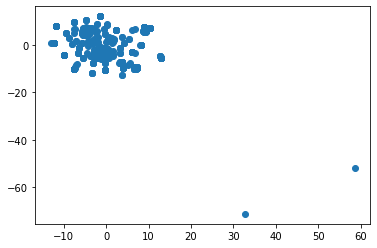

In [24]:
# Plot t-SNE output (x -60 10, y -20 50)
x_axis = tsne_features[:,0]
y_axis = tsne_features[:,1]
plt.scatter(x_axis, y_axis)
plt.show

In [25]:
# Identify clusters with k-means
inertia = []
k = [1,2,3,4,5,6,7,8,9,10] 
# list(range(1,11))

# get the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters= i , random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [26]:
# create elbow df
elbow_data = {"k": k, "inertia": inertia}
df2 = pd.DataFrame(elbow_data)

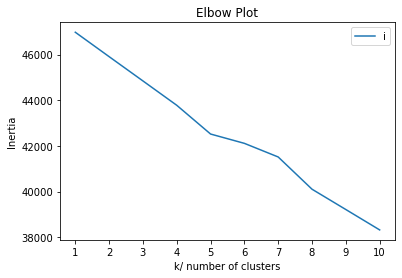

In [27]:
# Create an elbow plot x 2,4,6,8,10, y 39000 47000
plt.plot(df2['k'], df2['inertia'])
plt.xticks(range(1,11))
#,[2,4,6,8,10]
plt.xlabel('k/ number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.legend('inertia')
plt.show()